# Shrooms detection dataset (edible and poisonous)

In [1]:
import pandas as pd 

df = pd.read_csv("mushrooms.csv")
df.head(n=1)
df.isnull().sum() #no missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [2]:
df['class'].value_counts() #the target is balanced. similar amount of edible and poisonous classes. accuracy will be an adequate measure

e    4208
p    3916
Name: class, dtype: int64

## Label encoding the target 

In [3]:
from sklearn.preprocessing import LabelEncoder

target = df['class']
lab = LabelEncoder()

lab.fit(target)
y_trans = lab.transform(target)
print("Original letter encoding",  target[:10])
print("poisonous and edible transformed to 0 = edible and 1 = poisonous", y_trans[:10])

df['y_trans'] = y_trans #adding transformed variable to data frame




Original letter encoding 0    p
1    e
2    e
3    p
4    e
5    e
6    e
7    e
8    p
9    e
Name: class, dtype: object
poisonous and edible transformed to 0 = edible and 1 = poisonous [1 0 0 1 0 0 0 0 1 0]


## Visualising some of the features 

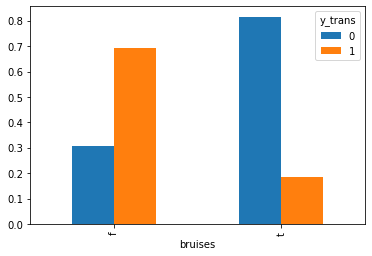

In [4]:
#bruising

import matplotlib.pyplot as plt

bruises = df.groupby("bruises").y_trans.value_counts(normalize = True)
bruises = bruises.unstack()
bruises.plot(kind = 'bar')

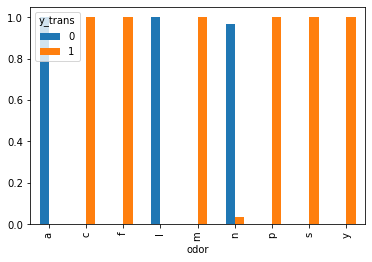

In [5]:
#odor

odor = df.groupby("odor").y_trans.value_counts(normalize = True)
odor = odor.unstack()
odor.plot(kind = 'bar')

#all odors are considered poisonous except a which is almond, n which is no odor and l which is anise

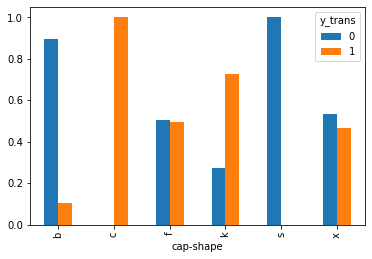

In [6]:
#cap shape 

cap_shape = df.groupby("cap-shape").y_trans.value_counts(normalize = True)
cap_shape = cap_shape.unstack()
cap_shape.plot(kind = 'bar')

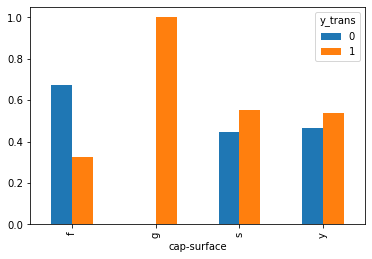

In [7]:
# Cap surface

cap_surface = df.groupby("cap-surface").y_trans.value_counts(normalize = True)
cap_surface = cap_surface.unstack()
cap_surface.plot(kind = 'bar')

#G: grooves was all poisonous

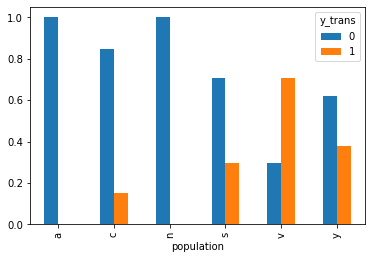

In [8]:
# Population 

pop = df.groupby("population").y_trans.value_counts(normalize = True)
pop = pop.unstack()
pop.plot(kind = 'bar')

#When there is several shrooms, they tend to be most likely poisonous "v"

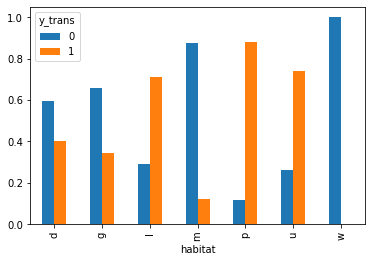

In [9]:
#Habitat 

hab = df.groupby("habitat").y_trans.value_counts(normalize = True)
hab = hab.unstack()
hab.plot(kind = 'bar')

#when habitat is leaves, paths and urban, they tend to be poisonous


# starting off with 6 features from the dataset 

In [10]:
X = df[["bruises","odor", "cap-shape", "cap-surface", "population", "habitat"]]
y = df['y_trans']

#coverting all categorical variables to dummy variables 
# remember dummy variables need classes - 1 to represent the whole information
#each dummy variables should be one less column than original

# bruises_dummies = pd.get_dummies(X['bruises']).iloc[:,1]
# print(bruises_dummies)
# odor_dummies = pd.get_dummies(X['odor']).iloc[:,1:9]
# print(odor_dummies)
# cap_shape_dummies = pd.get_dummies(X['cap-shape']).iloc[:,1:6]
# print(cap_shape_dummies)
# cap_surface_dummies = pd.get_dummies(X['cap-surface'], drop_first = True) #drop first removes first column, easier than using iloc
# print(cap_surface_dummies)

#This can all be automated this way with a for loop
#drop_first argument will drop each variables first class

for i in X.columns:
    X = pd.get_dummies(X, prefix=[i], columns=[i], drop_first = True)
X


,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,cap-shape_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


# Fitting a logisitc regression model

In [11]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3,
                                                   random_state = 100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(5686, 28)
(2438, 28)
(5686,)
(2438,)


In [12]:
model.fit(X_train, y_train)
print(model.intercept_.round(2))
model.coef_.round(2)

[-2.57]


array([[-1.81,  6.51,  7.33, -2.44,  1.24, -2.83,  6.4 ,  3.65,  3.6 ,
         1.61, -0.82, -0.11, -1.43, -1.3 ,  1.83,  0.52,  1.16,  3.92,
        -2.46, -0.57,  3.98,  0.05,  2.18, -0.9 ,  2.83,  0.61,  1.05,
        -1.51]])

## Testing model accuracy 

In [13]:
y_pred = model.predict(X_test)
print((y_test==y_pred).sum())
accuracy = (y_test==y_pred).sum()/y_test.shape[0]
print("Model accuracy on the test set was", accuracy)

2410
Model accuracy on the test set was 0.9885151763740772


# Using all features with the logistic regression model

In [14]:
lis = df.columns
len(lis) #24 colums but don't include first column 0 which is target and column 24 which is y_trans
lis[0]

X2 = df.iloc[:,1:23] 
y2 = df['y_trans']

print(X2[:5])
print(y2[:5])

for i in X2.columns:
    X2 = pd.get_dummies(X2, columns = [i], drop_first = True)
    
X2

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                    

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


# Fitting logistic regression model

In [15]:
model2 = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X2, y_trans, test_size = 0.3, random_state = 100, shuffle = True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 95)
(2438, 95)
(5686,)
(2438,)


In [16]:
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy = (y_test == y_pred2).sum()/y_test.shape[0] #remember y_test is 1 dimension so we use 0 as shape
print(accuracy) #100 % accuracy



1.0


# Building a decision tree model 

In [22]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

#Searching for a few of the best parameter values
#all keys are parameters in the DecisionTreeClassifier 

param_grid = {
    "max_depth": [5,15,25,35],
    "min_samples_leaf": [1,3,5],
    "max_leaf_nodes": [10,20,35,50,60]
}

dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring = 'accuracy', cv = 10)

gs.fit(X_train, y_train) 

print("best params",gs.best_params_)

dt_best = gs.best_score_
print("best score", gs.best_score_) 

#After cross validation, the best score was 0.97

#Now testing the best paramas on the test set 

dt_best_params = DecisionTreeClassifier(max_depth = 15, max_leaf_nodes = 20, min_samples_leaf = 1)
dt_best_params.fit(X_train, y_train)

dt_ypred = dt_best_params.predict(X_test)

accuracy_dt = (y_test == dt_ypred).sum()/y_test.shape[0]
print(accuracy_dt) #100% accuracy for decision tree


best params {'max_depth': 15, 'max_leaf_nodes': 20, 'min_samples_leaf': 1}
best score 1.0
1.0


# Building a random forest model

## Using elbow graph to determine No of  trees to build with

<ipython-input-30-b148604136fc>:26: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(1,1) #note: chose ylim 1,1 considering accuracy no matter how many trees are built is ~ 100%


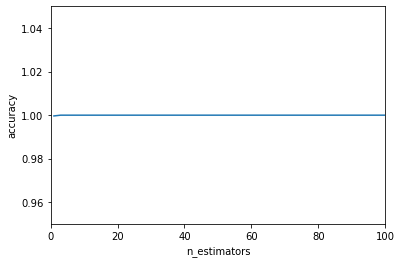

RandomForestClassifier(n_estimators=5)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#Elbow graph optimizes performance without adding unnecessary complexity 

#find optimal value between 1 and 100 trees

n_estimators = list(range(1,101))

param_grid = {
    "n_estimators": n_estimators,
}

rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv = 10)
gs.fit(X_train, y_train)

#print(cv_results_) this is a dictionary that stores a lot of data. We want the mean_test_score key.

scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0,100)
plt.ylim(1,1) #note: chose ylim 1,1 considering accuracy no matter how many trees are built is ~ 100%
plt.show()

#pick n_estimators where the accuracy levels off. best after that are probably by chance.
#between 0 and 100 are all ~100%. Deciding to choose to build model with 5 trees. 

rf = RandomForestClassifier(n_estimators = 5)
rf.fit(X_train,y_train)

In [31]:
print(rf.score(X_test,y_test) * 100) #100 % accuracy 
rf_pred = rf.predict(X_test)
accuracy_rf = (y_test == rf_pred).sum()/y_test.shape[0]

print("The accuracy of the random forest model on the shrooms dataset is", accuracy_rf * 100, "%")

100.0
The accuracy of the random forest model on the shrooms dataset is 100.0 %


# Building a neural network

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy 

In [33]:
list2 = X2.columns
list2.shape #95 columns/features
input_size = 95,

model = Sequential([
    Dense(units = 10, input_shape = input_size, activation = 'relu'),
    Dense(units = 20, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
 ])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                960       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


## Compiling and fitting the model

In [36]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs = 100, shuffle = True, verbose = 2  )

Epoch 1/100
143/143 - 0s - loss: 5.5979e-05 - accuracy: 1.0000 - val_loss: 2.5221e-04 - val_accuracy: 1.0000
Epoch 2/100
143/143 - 0s - loss: 4.7926e-05 - accuracy: 1.0000 - val_loss: 2.2978e-04 - val_accuracy: 1.0000
Epoch 3/100
143/143 - 0s - loss: 4.1134e-05 - accuracy: 1.0000 - val_loss: 1.9866e-04 - val_accuracy: 1.0000
Epoch 4/100
143/143 - 0s - loss: 3.5969e-05 - accuracy: 1.0000 - val_loss: 1.7351e-04 - val_accuracy: 1.0000
Epoch 5/100
143/143 - 0s - loss: 3.0995e-05 - accuracy: 1.0000 - val_loss: 1.5705e-04 - val_accuracy: 1.0000
Epoch 6/100
143/143 - 0s - loss: 2.7234e-05 - accuracy: 1.0000 - val_loss: 1.5279e-04 - val_accuracy: 1.0000
Epoch 7/100
143/143 - 0s - loss: 2.4105e-05 - accuracy: 1.0000 - val_loss: 1.4527e-04 - val_accuracy: 1.0000
Epoch 8/100
143/143 - 0s - loss: 2.1487e-05 - accuracy: 1.0000 - val_loss: 1.1448e-04 - val_accuracy: 1.0000
Epoch 9/100
143/143 - 0s - loss: 1.9041e-05 - accuracy: 1.0000 - val_loss: 1.1177e-04 - val_accuracy: 1.0000
Epoch 10/100
143/14

Epoch 74/100
143/143 - 0s - loss: 1.3541e-07 - accuracy: 1.0000 - val_loss: 1.3642e-06 - val_accuracy: 1.0000
Epoch 75/100
143/143 - 0s - loss: 1.2764e-07 - accuracy: 1.0000 - val_loss: 1.3002e-06 - val_accuracy: 1.0000
Epoch 76/100
143/143 - 0s - loss: 1.1845e-07 - accuracy: 1.0000 - val_loss: 1.1913e-06 - val_accuracy: 1.0000
Epoch 77/100
143/143 - 0s - loss: 1.1165e-07 - accuracy: 1.0000 - val_loss: 1.1560e-06 - val_accuracy: 1.0000
Epoch 78/100
143/143 - 0s - loss: 1.0387e-07 - accuracy: 1.0000 - val_loss: 1.0131e-06 - val_accuracy: 1.0000
Epoch 79/100
143/143 - 0s - loss: 9.7200e-08 - accuracy: 1.0000 - val_loss: 9.7961e-07 - val_accuracy: 1.0000
Epoch 80/100
143/143 - 0s - loss: 9.1997e-08 - accuracy: 1.0000 - val_loss: 9.2916e-07 - val_accuracy: 1.0000
Epoch 81/100
143/143 - 0s - loss: 8.5881e-08 - accuracy: 1.0000 - val_loss: 8.6843e-07 - val_accuracy: 1.0000
Epoch 82/100
143/143 - 0s - loss: 8.1835e-08 - accuracy: 1.0000 - val_loss: 7.9980e-07 - val_accuracy: 1.0000
Epoch 83/1

In [48]:
accuracy = model.evaluate(X_test, y_test) #100 % accuracy.

77/77 [==============================] - 0s 713us/step - loss: 7.5144e-08 - accuracy: 1.0000
